# Himalayan Mountaineering Analysis
## CPSC 322
## Fall, 2022
### Jaymin West, Dominic MacIsaac
---------------------------------------------------------

In [47]:
import importlib

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyAssociationRuleMiner, MyRandomForrestClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

import eda_utils
importlib.reload(eda_utils)

import matplotlib.pyplot as plt

import numpy as np

### Cleaning Data:

In [41]:
himalaya_table = MyPyTable()
himalaya_table.load_from_file("data/322-Final-Dataset.csv")

# Removing all rows with missing values
himalaya_table.remove_rows_with_missing_values("")

# Converting the SMTMEMBERS row to binary values as this will be 
#   what we will use for predictions
himalaya_table.convert_row_to_binary("SUMMIT_SUCCESS", 0.0)
himalaya_table = himalaya_table.combine_boolean_rows("SKI", "PARAPENTE", "TRUE")

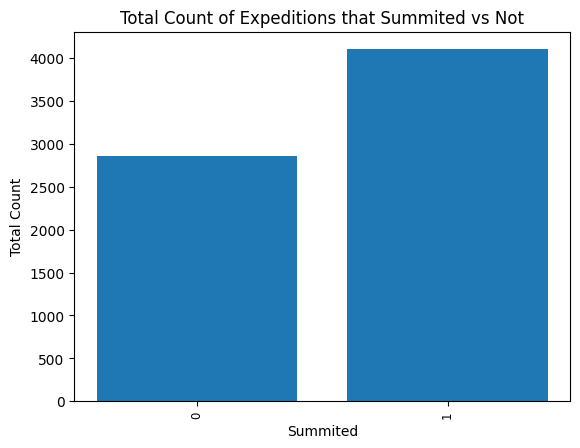

In [3]:
summit_col = eda_utils.get_column(himalaya_table.data,himalaya_table.column_names,"SUMMIT_SUCCESS")
eda_utils.generate_frequency_diagram(summit_col,"Summited", "Total Count", "Total Count of Expeditions that Summited vs Not")

## Data Analysis

Creating the success and failure tables:

In [4]:
success_table = MyPyTable()
success_table.column_names = himalaya_table.column_names
success_table.data = [row for row in himalaya_table.data if row[-1] == 1]

failure_table = MyPyTable()
failure_table.data = [row for row in himalaya_table.data if row[-1] == 0]
failure_table.column_names = himalaya_table.column_names

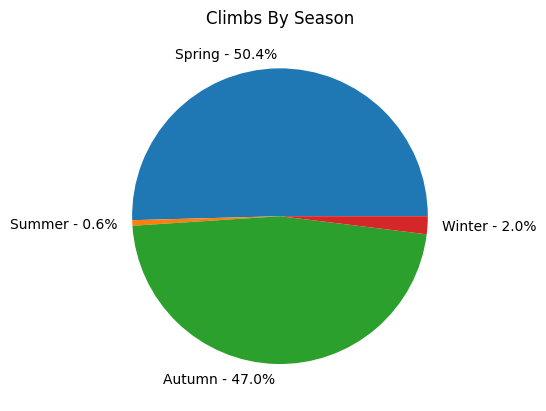

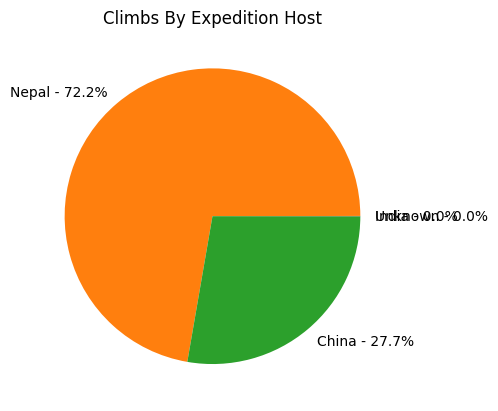

In [48]:
eda_utils.generate_pie_chart_from_column(himalaya_table, "SEASON", ['Spring', 'Summer', 'Autumn', 'Winter'], "Climbs By Season")
eda_utils.generate_pie_chart_from_column(himalaya_table, "HOST", ['Unknown', 'Nepal', 'China', 'India'], "Climbs By Expedition Host")

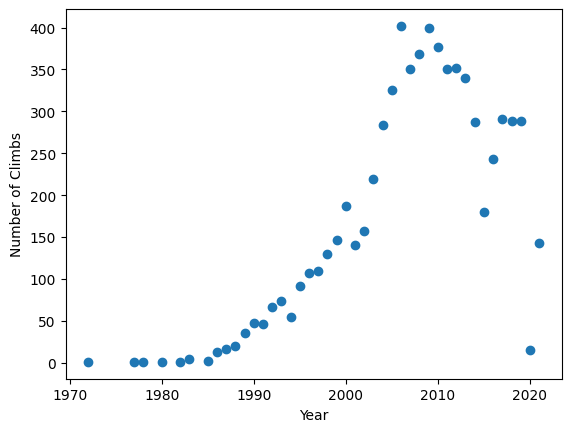

In [6]:
eda_utils.generate_scatter_plot(himalaya_table, "YEAR", "Year", "Number of Climbs")

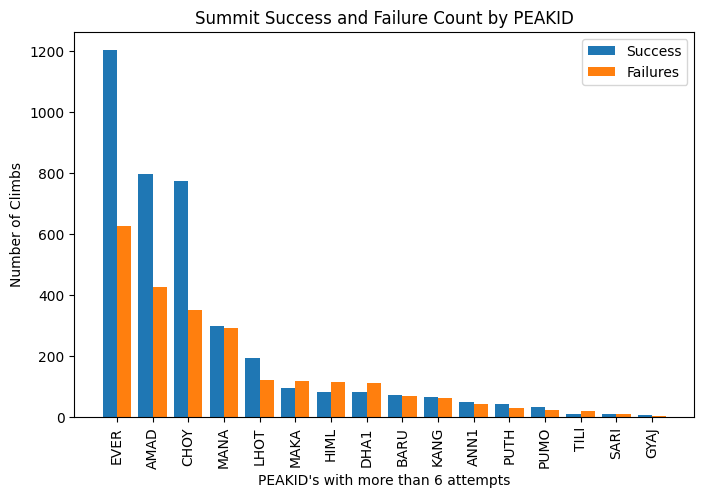

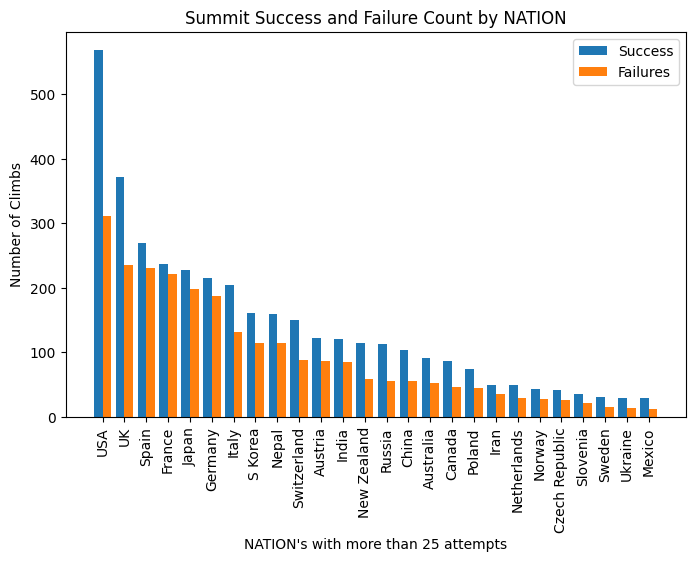

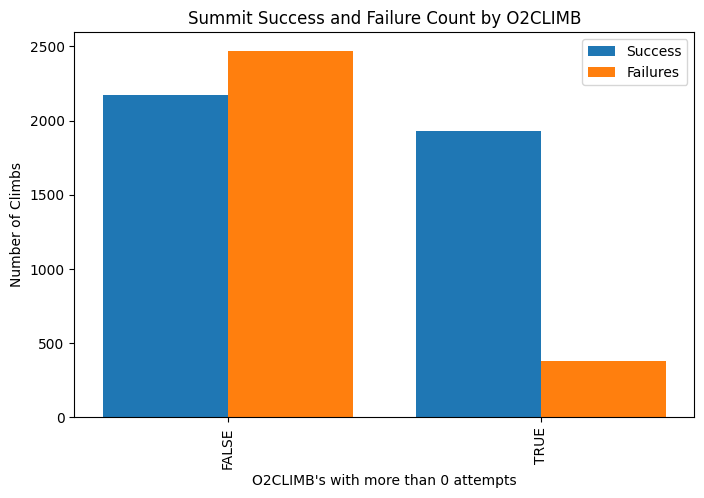

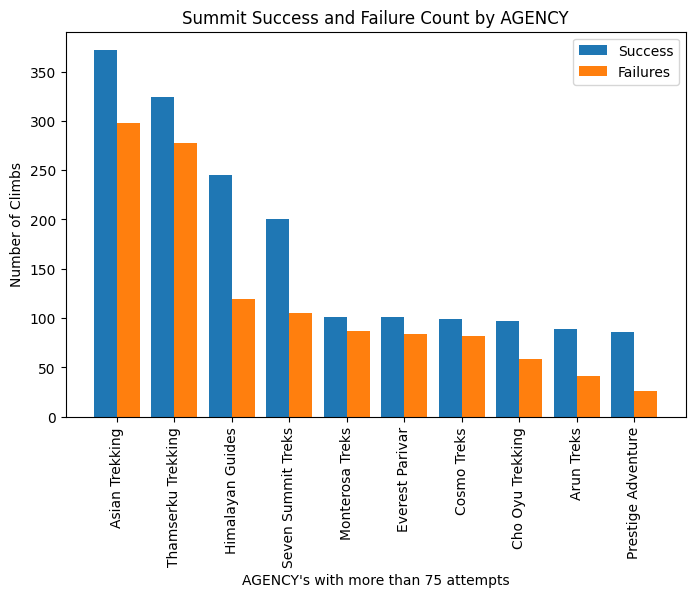

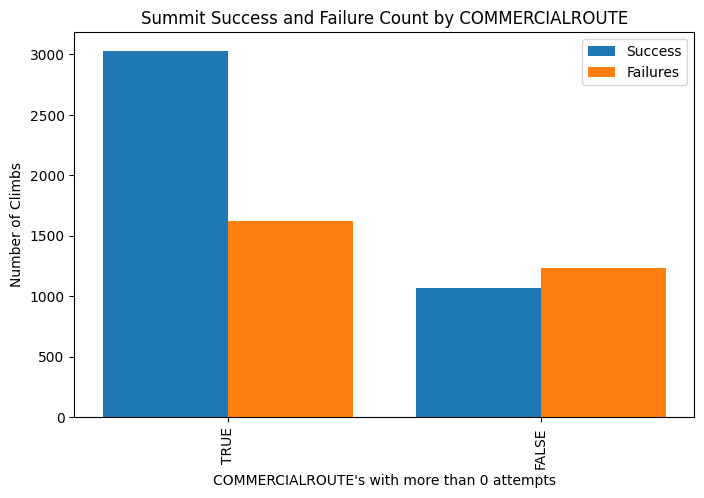

In [33]:
eda_utils.make_success_and_failure_chart(success_table, failure_table, "PEAKID", 6)
eda_utils.make_success_and_failure_chart(success_table, failure_table, "NATION", 25)
eda_utils.make_success_and_failure_chart(success_table, failure_table, "O2CLIMB", 0)
eda_utils.make_success_and_failure_chart(success_table, failure_table, "AGENCY", 75)
eda_utils.make_success_and_failure_chart(success_table, failure_table, "COMMERCIALROUTE", 0)

## Creating Training Data (with and without attribute selection)

In [ ]:
X_train = [row[:-1] for row in himalaya_table.data]
y_train = [row[-1] for row in himalaya_table.data]
# Only using YEAR, SEASON, HOST, 02CLIMB, COMMERCIALROUTE:
select_X_train = [[row[1], row[2], row[3], row[10], row[14]] for row in himalaya_table.data]

## Naive Bayes Classifying:

In [ ]:
himalaya_nb_classifier = MyNaiveBayesClassifier()

classifier_stats = myutils.get_classifier_stats(himalaya_nb_classifier, X_train, y_train, 10)
select_classifier_stats = myutils.get_classifier_stats(himalaya_nb_classifier, select_X_train, y_train, 10)

myutils.print_stats("Naive Bayes Results %", classifier_stats)
myutils.print_stats("Naive Bayes Results %\nTrained on YEAR, SEASON, HOST, 02CLIMB, COMMERCIALROUTE ", select_classifier_stats)

Naive Bayes Results %
Accuracy:  59.4
Error Rate:  40.6
Precision:  52.7
Recall:  9.3
F1 Score:  15.7
Naive Bayes Results %
Trained on YEAR, SEASON, HOST, 02CLIMB, COMMERCIALROUTE 
Accuracy:  65.2
Error Rate:  34.8
Precision:  58.099999999999994
Recall:  54.900000000000006
F1 Score:  56.3


## Decision Tree Classifying:

In [ ]:
himalaya_nb_classifier = MyDecisionTreeClassifier()

classifier_stats = myutils.get_classifier_stats(himalaya_nb_classifier, X_train, y_train, 10)
select_classifier_stats = myutils.get_classifier_stats(himalaya_nb_classifier, select_X_train, y_train, 10)

myutils.print_stats("Decision Tree Results %\nTrained on ALL attributes", classifier_stats)
myutils.print_stats("Decision Tree Results %\nTrained on YEAR, SEASON, HOST, 02CLIMB, COMMERCIALROUTE", select_classifier_stats)

Decision Tree Results %
Trained on ALL attributes
Accuracy:  16.5
Error Rate:  83.5
Precision:  48.3
Recall:  13.0
F1 Score:  20.5
Decision Tree Results %
Trained on YEAR, SEASON, HOST, 02CLIMB, COMMERCIALROUTE
Accuracy:  63.800000000000004
Error Rate:  36.199999999999996
Precision:  54.900000000000006
Recall:  71.8
F1 Score:  61.199999999999996


## Random Forest Classification:

In [ ]:
himalaya_rf = MyRandomForrestClassifier(10, 4, 2)

classifier_stats = myutils.get_classifier_stats(himalaya_rf, X_train, y_train, 10)
select_classifier_stats = myutils.get_classifier_stats(himalaya_rf, select_X_train, y_train, 10)

myutils.print_stats("Random Forest Results %\nTrained on ALL attributes", classifier_stats)
myutils.print_stats("Random Forest Results %\nTrained on YEAR, SEASON, HOST, 02CLIMB, COMMERCIALROUTE", select_classifier_stats)

Random Forest Results %
Trained on ALL attributes
Accuracy:  61.199999999999996
Error Rate:  38.800000000000004
Precision:  59.0
Recall:  33.1
F1 Score:  41.4
Random Forest Results %
Trained on YEAR, SEASON, HOST, 02CLIMB, COMMERCIALROUTE
Accuracy:  58.5
Error Rate:  41.5
Precision:  49.5
Recall:  49.3
F1 Score:  49.0


## Association Rule Miner

In [ ]:
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyAssociationRuleMiner
from copy import deepcopy

rule_miner = MyAssociationRuleMiner()

himalayan_X = deepcopy(himalaya_table.data)
himalayan_X = myutils.prepend_attribute_label(himalayan_X, himalaya_table.column_names)

rule_miner.fit(himalayan_X)
rule_miner.print_association_rules()

  #  association rule                            support    confidence      lift
---  ----------------------------------------  ---------  ------------  --------
  0  IF CAMPS=3.0 THEN O2UNKWN=FALSE            0.304254      0.999528  1.00097
  1  IF CAMPS=3.0 THEN SKI=False                0.294625      0.967894  0.990675
  2  IF COMMERCIALROUTE=FALSE THEN HOST=1.0     0.323225      0.976128  1.35108
  3  IF COMMERCIALROUTE=FALSE THEN SKI=False    0.325093      0.981771  1.00488
  4  IF HOST=2.0 THEN COMMERCIALROUTE=TRUE      0.269474      0.97251   1.45396
  5  IF PEAKID=EVER THEN COMMERCIALROUTE=TRUE   0.254096      0.966648  1.4452
  6  IF COMMERCIALROUTE=TRUE THEN SKI=False     0.651911      0.974645  0.997585
  7  IF HOST=1.0 THEN O2SLEEP=FALSE             0.589825      0.816391  1.02111
  8  IF HOST=1.0 THEN O2UNKWN=FALSE             0.721184      0.99821   0.999646
  9  IF HOST=1.0 THEN SKI=False                 0.710405      0.98329   1.00643
 10  IF STDROUTE=FALSE THEN HOST=1.0

In [ ]:
rule_miner = MyAssociationRuleMiner()

himalayan_X = deepcopy(himalaya_table.data)
himalayan_X = myutils.prepend_attribute_label(himalayan_X, himalaya_table.column_names)
himalayan_X = [[row[0],row[1], row[2], row[3],row[10], row[14], row[16]] for row in himalayan_X]

rule_miner.fit(himalayan_X)
rule_miner.print_association_rules()

  #  association rule                            support    confidence     lift
---  ----------------------------------------  ---------  ------------  -------
  0  IF COMMERCIALROUTE=FALSE THEN HOST=1.0     0.323225      0.976128  1.35108
  1  IF HOST=2.0 THEN COMMERCIALROUTE=TRUE      0.269474      0.97251   1.45396
  2  IF PEAKID=EVER THEN COMMERCIALROUTE=TRUE   0.254096      0.966648  1.4452
  3  IF SEASON=3.0 THEN O2CLIMB=FALSE           0.391636      0.833079  1.24765
  4  IF SUMMIT_SUCCESS=0 THEN O2CLIMB=FALSE     0.355275      0.866153  1.29718
  5  IF O2CLIMB=TRUE THEN SUMMIT_SUCCESS=1      0.277379      0.834775  1.41529


In [ ]:
rule_miner = MyAssociationRuleMiner(0.2,0.97)

himalayan_X = deepcopy(himalaya_table.data)
himalayan_X = myutils.prepend_attribute_label(himalayan_X, himalaya_table.column_names)
himalayan_X = [[row[0],row[1], row[2], row[3],row[4],row[5],
                row[7],row[8],row[9],row[10],row[11],
                row[13],row[14],row[16]] for row in himalayan_X]


rule_miner.fit(himalayan_X)
rule_miner.print_association_rules()

  #  association rule                          support    confidence     lift
---  --------------------------------------  ---------  ------------  -------
  0  IF COMMERCIALROUTE=FALSE THEN HOST=1.0   0.323225      0.976128  1.35108
  1  IF HOST=2.0 THEN COMMERCIALROUTE=TRUE    0.269474      0.97251   1.45396
  2  IF TOTHIRED=0.0 THEN O2SLEEP=FALSE       0.301667      0.974466  1.21883


In [ ]:
print(himalaya_table.column_names)

['PEAKID', 'YEAR', 'SEASON', 'HOST', 'NATION', 'BCDATE', 'SKI', 'CAMPS', 'TOTMEMBERS', 'TOTHIRED', 'O2CLIMB', 'O2SLEEP', 'O2UNKWN', 'AGENCY', 'COMMERCIALROUTE', 'STDROUTE', 'SUMMIT_SUCCESS']


In [ ]:
rule_miner = MyAssociationRuleMiner(0.3,0.75)

himalayan_X = deepcopy(himalaya_table.data)
himalayan_X = myutils.prepend_attribute_label(himalayan_X, himalaya_table.column_names)
himalayan_X = [[row[0],row[1], row[2], row[3],row[4],row[5],
                row[7],row[8],row[9],row[10],row[11],
                row[13],row[14],row[16]] for row in himalayan_X]


rule_miner.fit(himalayan_X)
rule_miner.print_association_rules()

KeyboardInterrupt: 